**Name:- Pranjal Godse - Batch - 6**

# Prob 2 - Word Embedding Mini Task

Objective: Understand pretrained word embeddings (Word2Vec & GloVe),
perform similarity, analogy, and PCA visualization.

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 83.2 MB/s eta 0:00:00


In [3]:
!pip install --upgrade gensim

In [4]:
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load Pretrained Word2Vec Model

In [6]:
word2vec_model = api.load('word2vec-google-news-300')
print('Vocabulary Size:', len(word2vec_model.key_to_index))
print('Vector Dimension:', word2vec_model.vector_size)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary Size: 3000000
Vector Dimension: 300


## Similar Words using Word2Vec

In [7]:
print(word2vec_model.most_similar('king'))
print(word2vec_model.most_similar('computer'))

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
[('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426), ('technician_Leonard_Luchko', 0.5662748217582703), ('mainframes_minicomputers', 0.5617720484733582), ('laptop_computers', 0.5585449934005737), ('PC', 0.5539618730545044), ('maker_Dell_DELL.O', 0.5519254207611084)]


## Analogy Task (king - man + woman)

In [8]:
print(word2vec_model.most_similar(positive=['king', 'woman'], negative=['man']))
print(word2vec_model.most_similar(positive=['paris', 'italy'], negative=['france']))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]
[('lohan', 0.5069674849510193), ('madrid', 0.481842964887619), ('heidi', 0.4799900949001312), ('real_madrid', 0.4753323495388031), ('florence', 0.4682057499885559), ('diego', 0.46727296710014343), ('ronnie', 0.4672326445579529), ('juventus', 0.4672062397003174), ('joel', 0.4653724133968353), ('huntelaar', 0.46358999609947205)]


## Load GloVe Model

In [9]:
glove_model = api.load('glove-wiki-gigaword-100')
print('Vocabulary Size:', len(glove_model.key_to_index))
print('Vector Dimension:', glove_model.vector_size)

[==================================================] 100.0% 128.1/128.1MB downloaded
Vocabulary Size: 400000
Vector Dimension: 100


## Similar Words using GloVe

In [10]:
print(glove_model.most_similar('king'))

[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


## PCA Visualization (2D Plot)

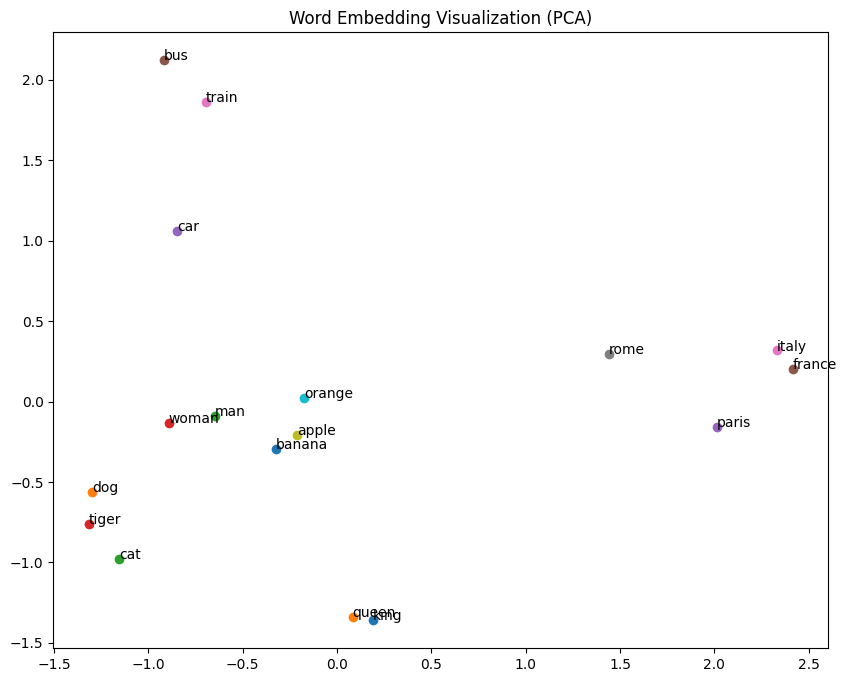

In [11]:
words = ['king','queen','man','woman','paris','france','italy','rome',
         'apple','orange','banana','dog','cat','tiger','car','bus','train']

vectors = [word2vec_model[word] for word in words if word in word2vec_model]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(10,8))
for i, word in enumerate(words):
    if word in word2vec_model:
        plt.scatter(result[i,0], result[i,1])
        plt.text(result[i,0], result[i,1], word)

plt.title('Word Embedding Visualization (PCA)')
plt.show()